### BRSET

* [Dataset](https://physionet.org/content/brazilian-ophthalmological/1.0.0/)

* [Original Paper](https://www.medrxiv.org/content/10.1101/2024.01.23.24301660v1)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings/brset/'
COLUMN = 'embeddings'

In [3]:
text_path, images_path = 'text_embeddings.csv', 'Embeddings_dinov2_giant.csv' # os.listdir(PATH)

## Get data

### Text

In [4]:
text = pd.read_csv(os.path.join(PATH, text_path))
text

,image_id,DR_ICDR,text,DR_2,DR_3,split,embeddings
0,img00001,0,"An image from the right eye of a male patient,...",0,0,train,"[-0.23097647726535797, -0.6493059992790222, 0...."
1,img00002,0,"An image from the left eye of a male patient, ...",0,0,test,"[-0.18894515931606293, -0.5165128707885742, 0...."
2,img00003,0,An image from the right eye of a female patien...,0,0,train,"[-0.6901693344116211, -0.7104458212852478, 0.5..."
3,img00004,0,An image from the left eye of a female patient...,0,0,train,"[-0.7486071586608887, -0.5078404545783997, 0.6..."
4,img00005,0,"An image from the right eye of a male patient,...",0,0,test,"[-0.5759348273277283, -0.6498719453811646, 0.7..."
...,...,...,...,...,...,...,...
16261,img16262,1,"An image from the left eye of a male patient, ...",1,1,test,"[-0.15599964559078217, -0.5760699510574341, 0...."
16262,img16263,0,"An image from the right eye of a male patient,...",0,0,train,"[-0.6628211736679077, -0.7985941767692566, 0.8..."
16263,img16264,0,"An image from the left eye of a male patient, ...",0,0,test,"[-0.710575520992279, -0.6339892745018005, 0.91..."
16264,img16265,0,"An image from the right eye of a male patient,...",0,0,train,"[0.040444035083055496, -0.4349224269390106, 0...."


### Images

In [5]:
images = pd.read_csv(os.path.join(PATH, images_path))
images.head()

,ImageName,0,1,2,3,4,5,6,7,8,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,img09798.jpg,2.496629,-1.418434,-1.019915,1.591017,0.491260,-0.092735,2.007252,-1.345458,0.348915,...,-1.242478,-1.984215,0.177130,0.785481,1.586383,1.195324,2.041120,2.138235,0.712282,0.109781
1,img05580.jpg,1.429685,-0.576934,-0.486726,1.763771,1.927822,-0.018304,1.117849,-0.405671,1.207696,...,-0.560915,-2.813773,0.306948,1.317252,1.365972,1.340654,3.317325,2.037762,0.057860,0.494940
2,img04048.jpg,1.843740,-0.841728,-1.293730,1.012648,1.812257,-0.167691,1.795487,-0.074153,0.611845,...,-1.021385,-2.318928,0.937278,1.398562,1.343400,1.153703,3.108043,1.643647,0.480916,0.093299
3,img03601.jpg,1.893658,-1.019693,-0.807079,1.942762,1.825112,-0.605565,1.617476,-0.543276,0.811001,...,-0.626070,-2.010830,0.078262,1.729771,1.841352,1.333966,2.347087,2.253357,0.266683,0.305193
4,img03469.jpg,1.670300,-0.171326,-0.553366,0.881651,1.344637,0.542186,1.548827,0.810848,0.426911,...,-1.621639,-1.707612,0.914994,0.301987,1.062562,1.148648,3.945711,1.855381,0.702893,0.630030


### Merge and preprocess the datasets

In [6]:
df = preprocess_data(text, images, "image_id", "ImageName")
df.drop(columns='text', inplace=True)
df.DR_3 = df.DR_3.astype(str)
df.to_csv(os.path.join(PATH, 'embeddings.csv'), index=False)
df.head()

,DR_ICDR,DR_2,DR_3,split,text_1,text_2,text_3,text_4,text_5,text_6,...,image_1526,image_1527,image_1528,image_1529,image_1530,image_1531,image_1532,image_1533,image_1534,image_1535
0,0,0,0,train,-0.230976,-0.649306,0.351964,4.827357,-0.652423,-1.548302,...,-0.321200,-1.895818,1.196687,1.986741,1.047986,1.503189,2.945741,2.566396,0.100422,0.039841
1,0,0,0,test,-0.188945,-0.516513,0.458152,4.739528,-0.524881,-1.532104,...,-0.007468,-1.980681,1.131782,1.909355,1.482123,1.014651,2.604582,2.267700,0.133543,-0.243325
2,0,0,0,train,-0.690169,-0.710446,0.562674,4.909813,-0.266062,-1.765767,...,-0.016114,-1.694332,1.244229,2.120176,1.228228,1.084082,2.284241,2.441288,0.548136,-0.184525
3,0,0,0,train,-0.748607,-0.507840,0.673932,4.859914,-0.071180,-1.733303,...,0.268266,-1.657310,0.901805,1.809422,1.395210,0.949156,2.093713,2.066097,0.544640,-0.578559
4,0,0,0,test,-0.575935,-0.649872,0.722284,5.002320,-0.277846,-1.737345,...,0.141679,-1.476505,1.064863,2.015743,1.148500,1.598261,2.477580,2.682755,-0.003177,-0.187033


## Data Perparation

In [7]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'DR_3'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (13012, 5636)
Test Shape: (3254, 5636)


### Models

In [8]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 2.75 MB
The number of parameters of the model are: 721667


STAGE:2024-02-16 14:01:48 15558:15558 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.8384, macro-f1: 0.5563
Epoch 1/50 - Training Time: 1.18 seconds | Inference Time: 0.37 seconds
Epoch 2/50 - Test Accuracy: 0.8476, macro-f1: 0.6094
Epoch 2/50 - Training Time: 1.26 seconds | Inference Time: 0.37 seconds
Epoch 3/50 - Test Accuracy: 0.8872, macro-f1: 0.6445
Epoch 3/50 - Training Time: 1.35 seconds | Inference Time: 0.38 seconds
Epoch 4/50 - Test Accuracy: 0.9321, macro-f1: 0.7032
Epoch 4/50 - Training Time: 1.40 seconds | Inference Time: 0.37 seconds
Epoch 5/50 - Test Accuracy: 0.9296, macro-f1: 0.6806
Epoch 5/50 - Training Time: 1.31 seconds | Inference Time: 0.39 seconds
Epoch 6/50 - Test Accuracy: 0.9170, macro-f1: 0.6929
Epoch 6/50 - Training Time: 1.32 seconds | Inference Time: 0.40 seconds
Epoch 7/50 - Test Accuracy: 0.9109, macro-f1: 0.6580
Epoch 7/50 - Training Time: 1.39 seconds | Inference Time: 0.39 seconds
Epoch 8/50 - Test Accuracy: 0.9628, macro-f1: 0.7930
Epoch 8/50 - Training Time: 1.31 seconds | Inference Time: 0.39 seconds


STAGE:2024-02-16 14:03:31 15558:15558 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-16 14:03:32 15558:15558 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch        10.40%        8.048s        58.42%       45.226s       4.434ms     -13.68 Gb     -13.71 Gb         10200  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        35.14%       27.203s        35.58%       27.547s       2.144ms      17.07 Gb      17.06 Gb         12850  
                              Optimizer.step#AdamW.step         5.25%        4.064s        19.71%       15.256s       1.496ms       5.51 Mb     -54.66

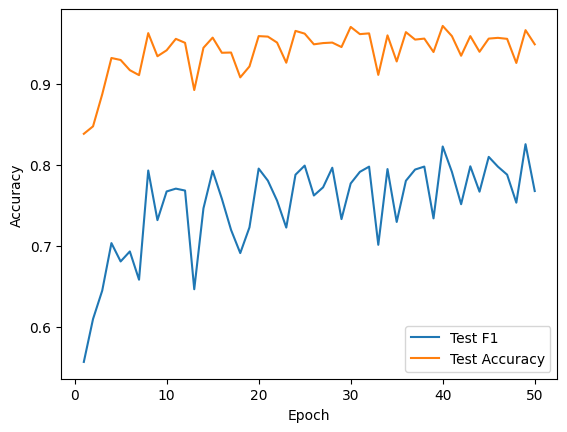

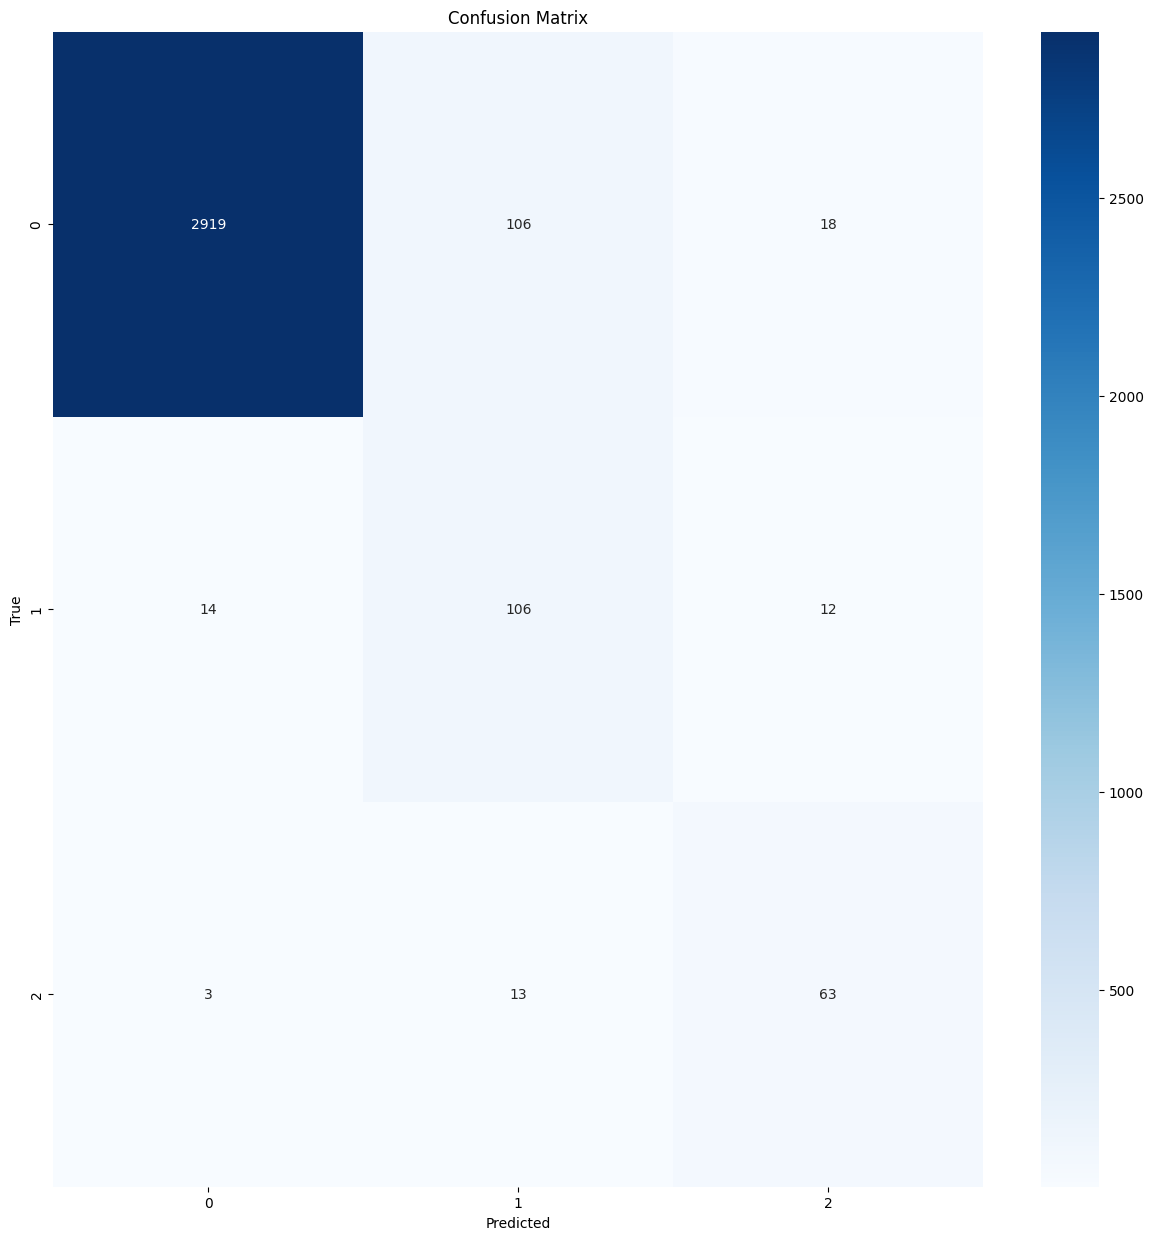

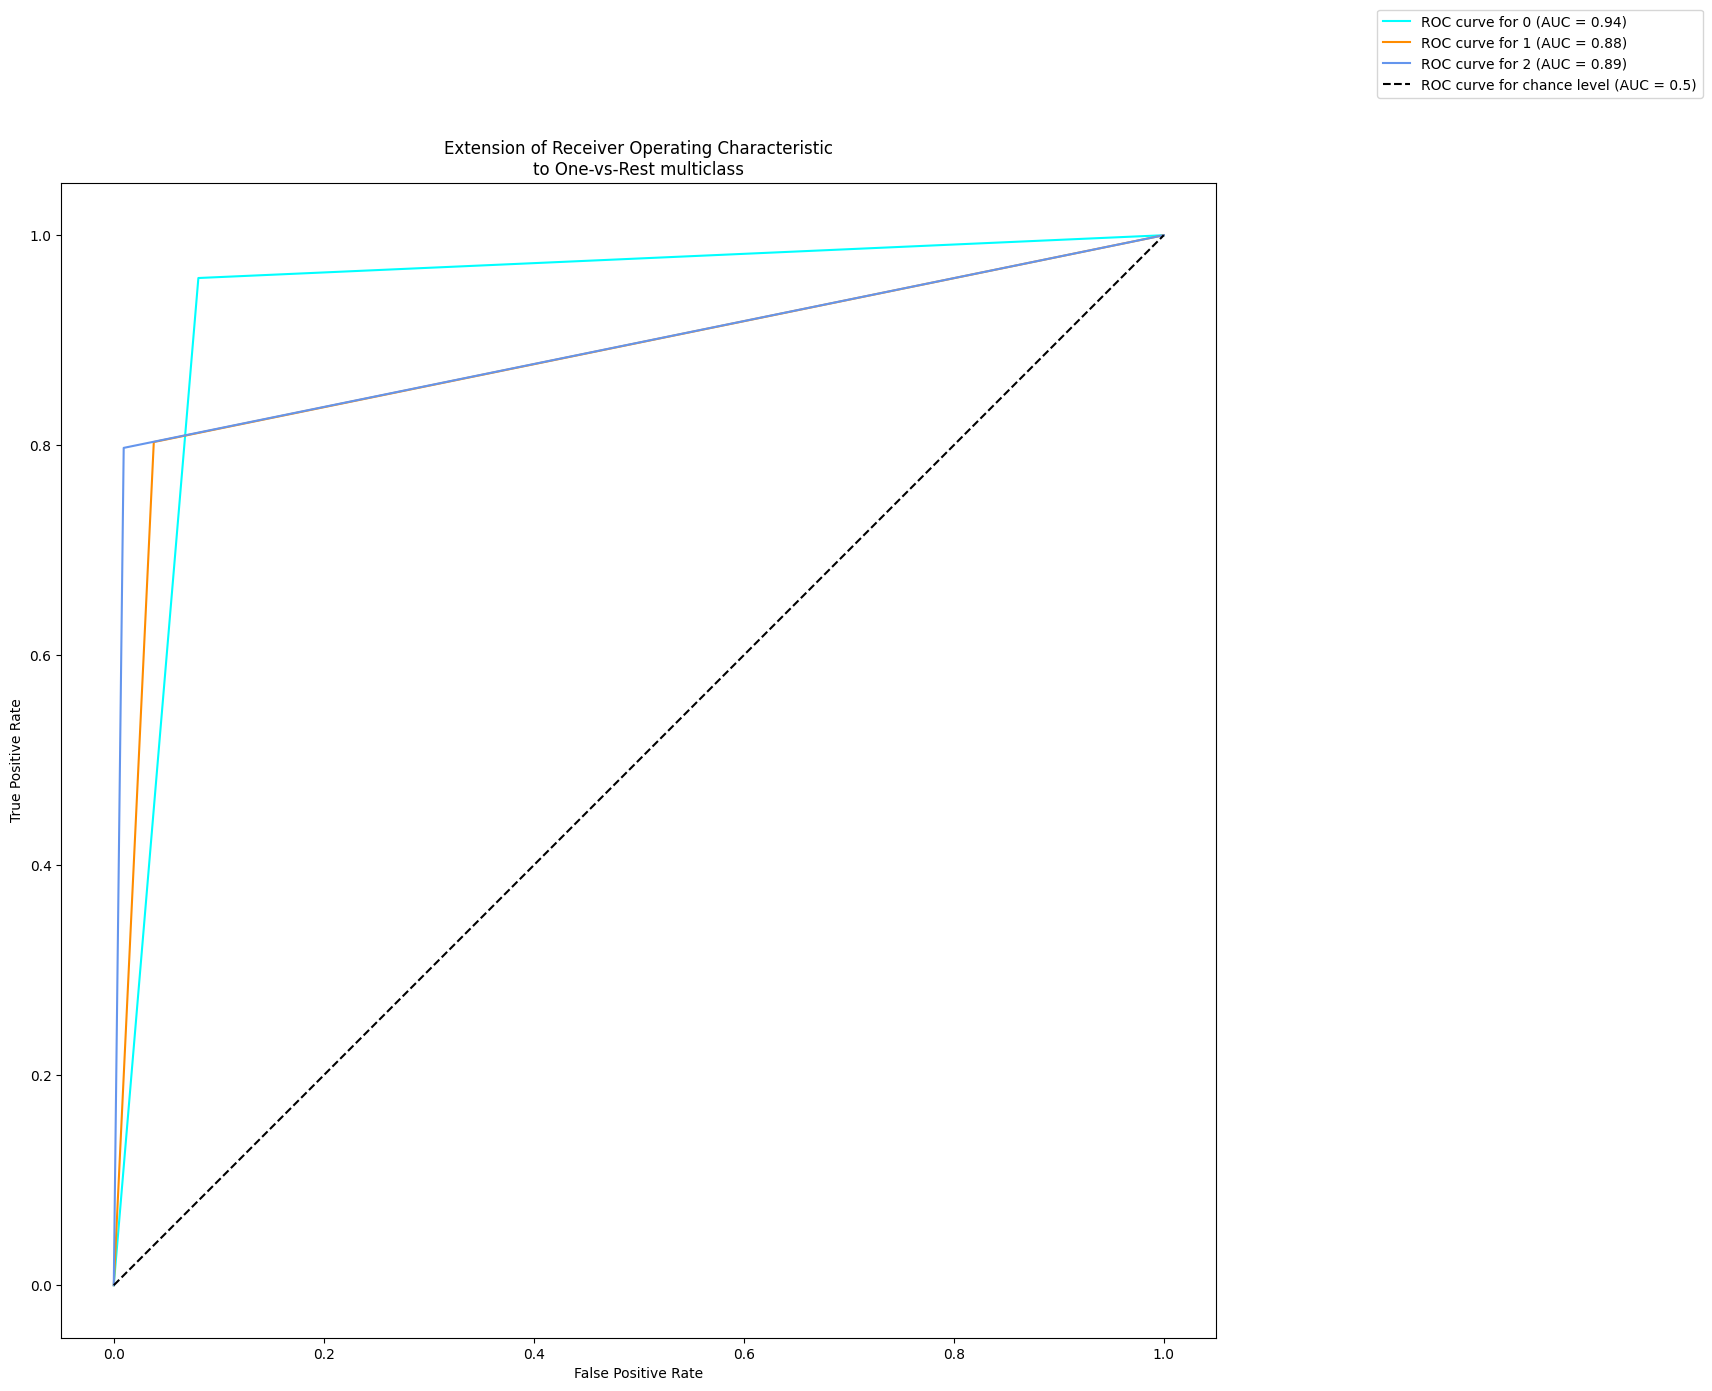

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3043
           1       0.47      0.80      0.59       132
           2       0.68      0.80      0.73        79

    accuracy                           0.95      3254
   macro avg       0.71      0.85      0.77      3254
weighted avg       0.97      0.95      0.95      3254



In [9]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 1.38 MB
The number of parameters of the model are: 361219


STAGE:2024-02-16 14:10:57 15558:15558 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/50 - Test Accuracy: 0.8679, macro-f1: 0.6223
Epoch 1/50 - Training Time: 2.15 seconds | Inference Time: 0.81 seconds
Epoch 2/50 - Test Accuracy: 0.9189, macro-f1: 0.6763
Epoch 2/50 - Training Time: 2.13 seconds | Inference Time: 0.79 seconds
Epoch 3/50 - Test Accuracy: 0.8245, macro-f1: 0.5298
Epoch 3/50 - Training Time: 2.08 seconds | Inference Time: 0.81 seconds
Epoch 4/50 - Test Accuracy: 0.8602, macro-f1: 0.5642
Epoch 4/50 - Training Time: 2.03 seconds | Inference Time: 0.79 seconds
Epoch 5/50 - Test Accuracy: 0.9450, macro-f1: 0.7442
Epoch 5/50 - Training Time: 1.90 seconds | Inference Time: 0.77 seconds
Epoch 6/50 - Test Accuracy: 0.9392, macro-f1: 0.7292
Epoch 6/50 - Training Time: 1.83 seconds | Inference Time: 0.78 seconds
Epoch 7/50 - Test Accuracy: 0.9121, macro-f1: 0.6837
Epoch 7/50 - Training Time: 1.79 seconds | Inference Time: 0.78 seconds
Epoch 8/50 - Test Accuracy: 0.9438, macro-f1: 0.7268
Epoch 8/50 - Training Time: 1.94 seconds | Inference Time: 0.77 seconds


STAGE:2024-02-16 14:13:31 15558:15558 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-16 14:13:31 15558:15558 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch        11.55%       10.762s        65.14%       60.685s       4.760ms     -17.06 Gb     -17.09 Gb         12750  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        34.46%       32.104s        34.83%       32.450s       2.525ms      17.07 Gb      17.06 Gb         12850  
                              Optimizer.step#AdamW.step         6.78%        6.312s        25.27%       23.544s       2.308ms       2.76 Mb     -27.25

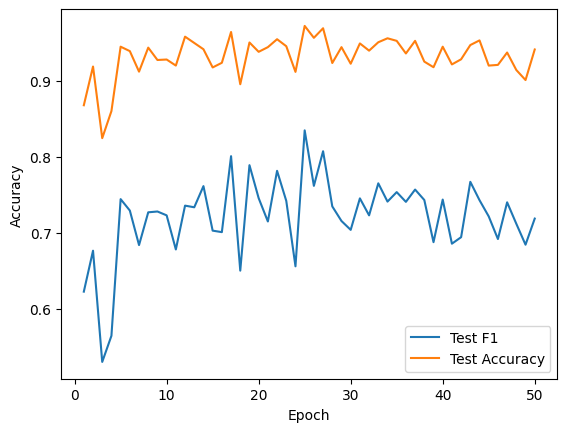

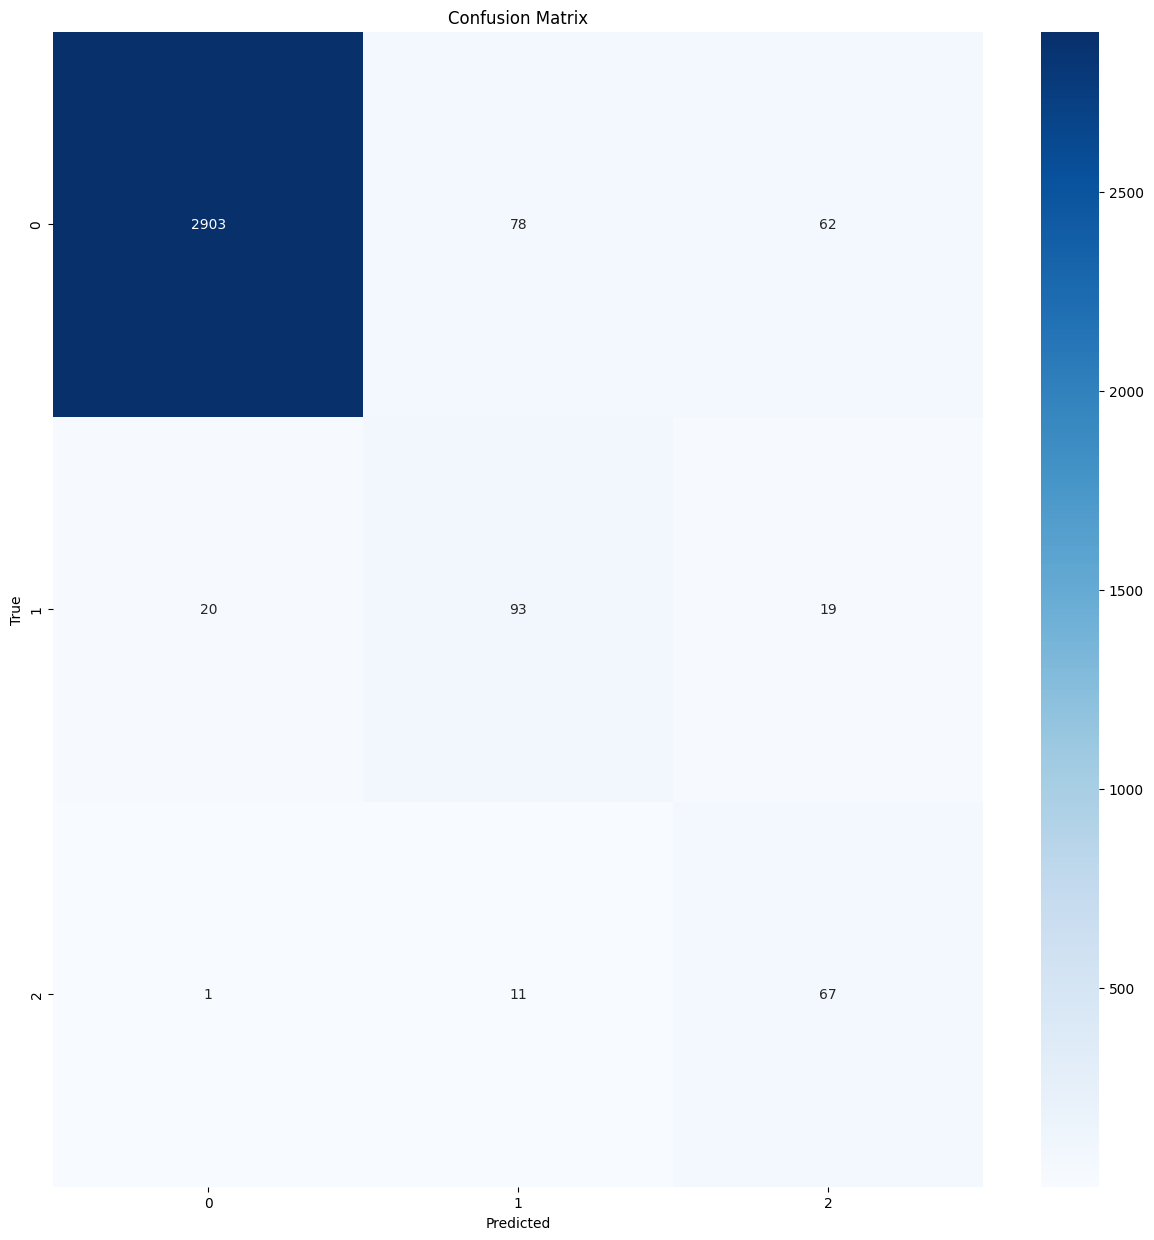

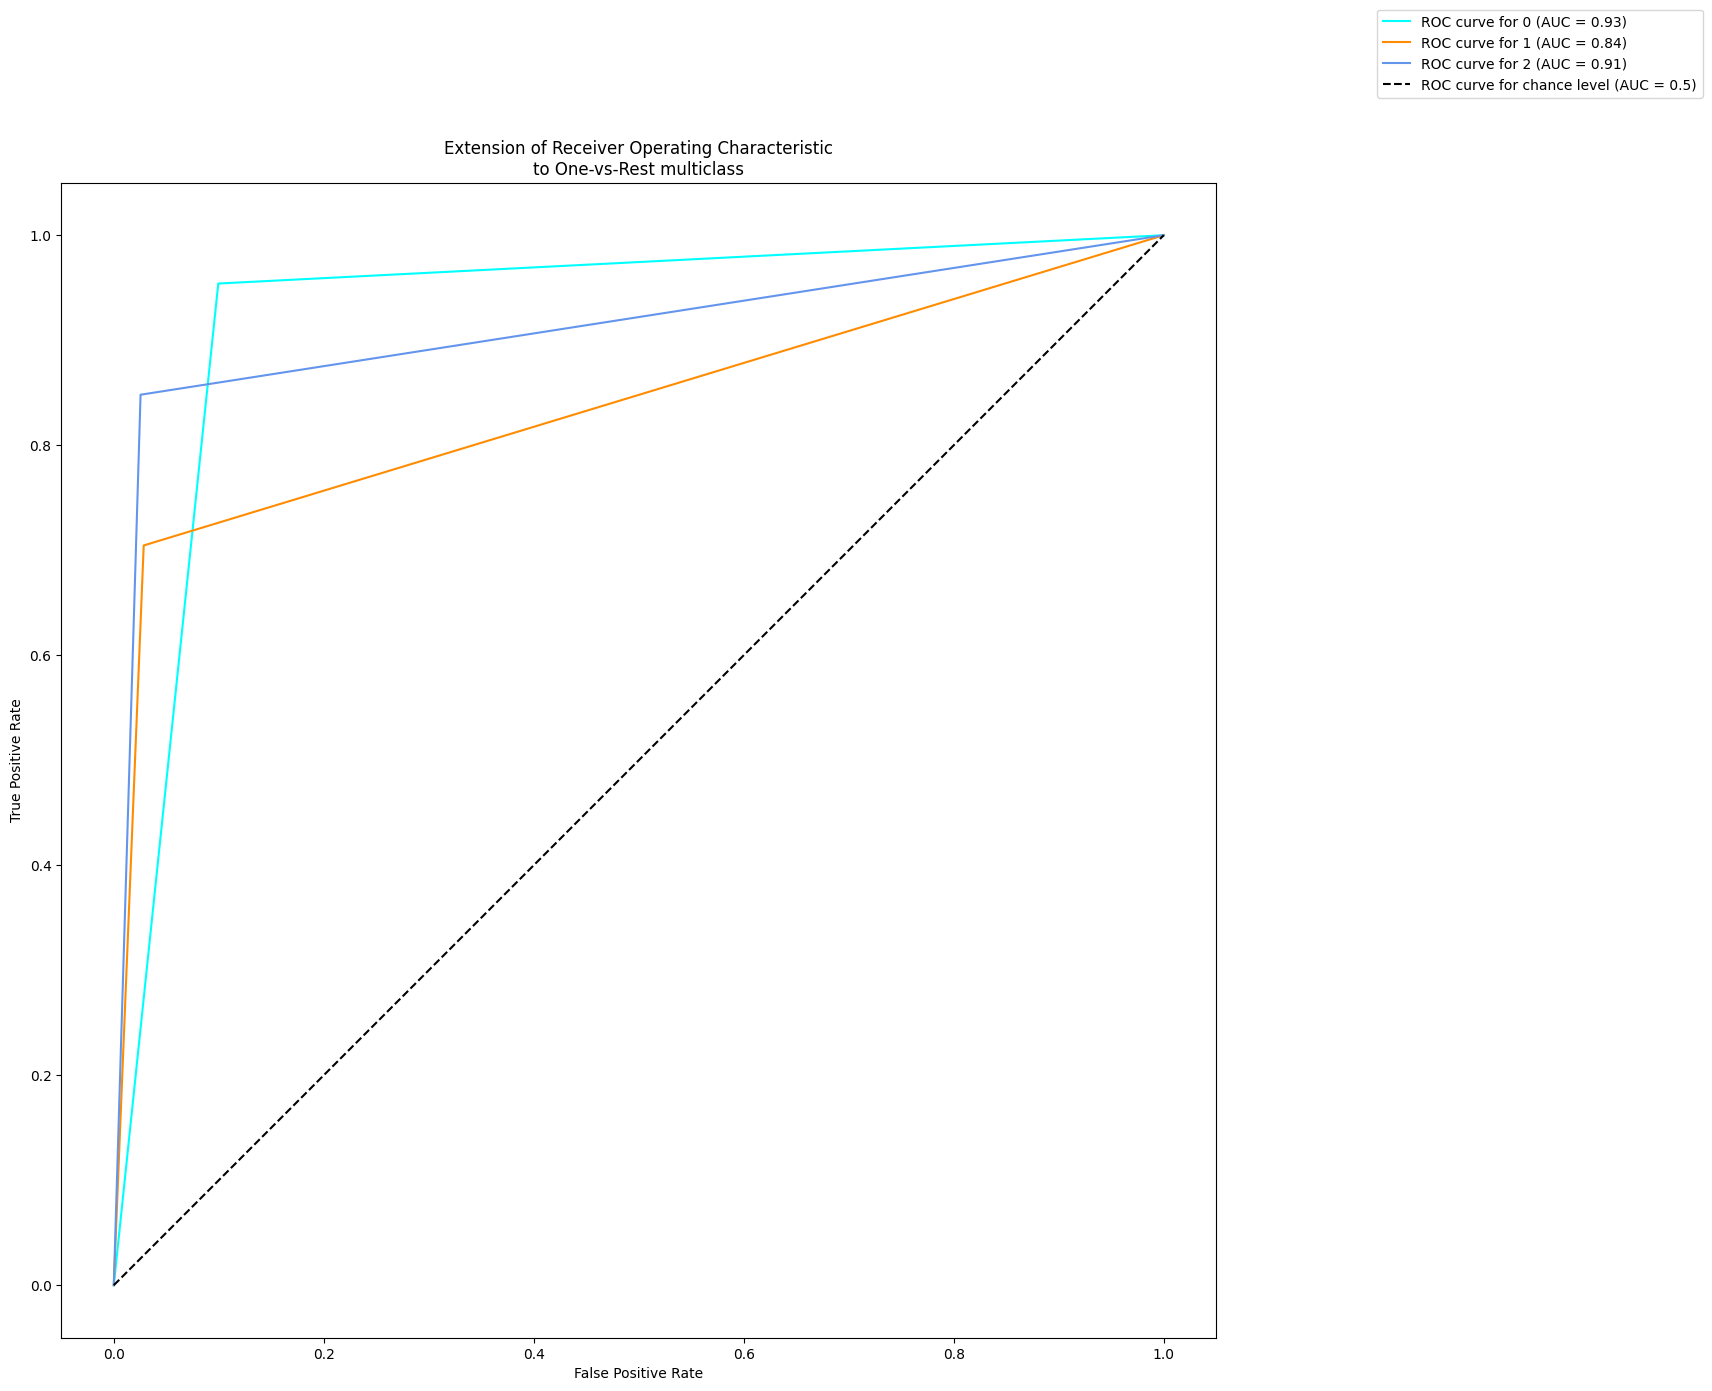

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3043
           1       0.51      0.70      0.59       132
           2       0.45      0.85      0.59        79

    accuracy                           0.94      3254
   macro avg       0.65      0.84      0.72      3254
weighted avg       0.96      0.94      0.95      3254



In [10]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=50, multilabel=multilabel, report=True)